## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.446152  0.494593 -1.101757  1.664933 -1.291597  1.641808
1 -1.167286  1.769755 -1.332104 -0.313375 -1.539252 -0.315535
2 -0.710609  1.639514 -1.461275  1.540175 -1.124254  1.591470
3 -0.498680  0.574769 -0.110357 -0.346304  1.650119  0.173607
4  0.854177 -0.701699 -1.005822  0.735770 -0.490838  0.635734


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9920714	total: 56ms	remaining: 56s
1:	learn: 0.9820216	total: 56.5ms	remaining: 28.2s
2:	learn: 0.9727374	total: 57ms	remaining: 18.9s
3:	learn: 0.9623427	total: 57.5ms	remaining: 14.3s
4:	learn: 0.9539823	total: 58ms	remaining: 11.5s
5:	learn: 0.9445784	total: 58.4ms	remaining: 9.68s
6:	learn: 0.9339037	total: 58.8ms	remaining: 8.35s
7:	learn: 0.9246166	total: 59.2ms	remaining: 7.35s
8:	learn: 0.9163729	total: 59.8ms	remaining: 6.58s
9:	learn: 0.9065449	total: 60.3ms	remaining: 5.97s
10:	learn: 0.8978840	total: 60.7ms	remaining: 5.46s
11:	learn: 0.8882479	total: 61.2ms	remaining: 5.04s
12:	learn: 0.8787386	total: 61.6ms	remaining: 4.68s
13:	learn: 0.8685314	total: 62.1ms	remaining: 4.38s
14:	learn: 0.8614485	total: 62.7ms	remaining: 4.11s
15:	learn: 0.8533798	total: 63.2ms	remaining: 3.89s
16:	learn: 0.8459375	total: 63.7ms	remaining: 3.68s
17:	learn: 0.8367277	total: 64.1ms	remaining: 3.5s
18:	learn: 0.8292455	total: 64.9ms	remaining: 3.35s
1

111:	learn: 0.3675860	total: 108ms	remaining: 859ms
112:	learn: 0.3645615	total: 109ms	remaining: 855ms
113:	learn: 0.3615841	total: 109ms	remaining: 850ms
114:	learn: 0.3588920	total: 110ms	remaining: 845ms
115:	learn: 0.3559611	total: 110ms	remaining: 841ms
116:	learn: 0.3533972	total: 111ms	remaining: 836ms
117:	learn: 0.3511970	total: 111ms	remaining: 831ms
118:	learn: 0.3487546	total: 112ms	remaining: 828ms
119:	learn: 0.3460317	total: 112ms	remaining: 823ms
120:	learn: 0.3436443	total: 113ms	remaining: 819ms
121:	learn: 0.3411540	total: 113ms	remaining: 815ms
122:	learn: 0.3378417	total: 114ms	remaining: 810ms
123:	learn: 0.3353868	total: 114ms	remaining: 806ms
124:	learn: 0.3329155	total: 115ms	remaining: 804ms
125:	learn: 0.3304182	total: 115ms	remaining: 800ms
126:	learn: 0.3278817	total: 116ms	remaining: 797ms
127:	learn: 0.3247794	total: 117ms	remaining: 794ms
128:	learn: 0.3220220	total: 117ms	remaining: 790ms
129:	learn: 0.3197669	total: 117ms	remaining: 786ms
130:	learn: 

276:	learn: 0.1241159	total: 186ms	remaining: 486ms
277:	learn: 0.1235294	total: 187ms	remaining: 486ms
278:	learn: 0.1230199	total: 188ms	remaining: 485ms
279:	learn: 0.1224248	total: 188ms	remaining: 484ms
280:	learn: 0.1219186	total: 189ms	remaining: 483ms
281:	learn: 0.1214464	total: 189ms	remaining: 482ms
282:	learn: 0.1205981	total: 190ms	remaining: 481ms
283:	learn: 0.1200833	total: 190ms	remaining: 479ms
284:	learn: 0.1197390	total: 191ms	remaining: 478ms
285:	learn: 0.1192619	total: 191ms	remaining: 477ms
286:	learn: 0.1187779	total: 191ms	remaining: 476ms
287:	learn: 0.1184155	total: 192ms	remaining: 474ms
288:	learn: 0.1180692	total: 192ms	remaining: 473ms
289:	learn: 0.1177169	total: 193ms	remaining: 472ms
290:	learn: 0.1171084	total: 193ms	remaining: 470ms
291:	learn: 0.1162918	total: 194ms	remaining: 470ms
292:	learn: 0.1159760	total: 194ms	remaining: 468ms
293:	learn: 0.1156006	total: 194ms	remaining: 467ms
294:	learn: 0.1150058	total: 195ms	remaining: 466ms
295:	learn: 

459:	learn: 0.0548116	total: 276ms	remaining: 324ms
460:	learn: 0.0546168	total: 276ms	remaining: 323ms
461:	learn: 0.0545431	total: 277ms	remaining: 322ms
462:	learn: 0.0542475	total: 277ms	remaining: 322ms
463:	learn: 0.0541802	total: 278ms	remaining: 321ms
464:	learn: 0.0539719	total: 278ms	remaining: 320ms
465:	learn: 0.0537020	total: 278ms	remaining: 319ms
466:	learn: 0.0533898	total: 279ms	remaining: 318ms
467:	learn: 0.0533381	total: 279ms	remaining: 318ms
468:	learn: 0.0531388	total: 280ms	remaining: 317ms
469:	learn: 0.0530881	total: 280ms	remaining: 316ms
470:	learn: 0.0528170	total: 281ms	remaining: 315ms
471:	learn: 0.0525635	total: 281ms	remaining: 315ms
472:	learn: 0.0523036	total: 282ms	remaining: 314ms
473:	learn: 0.0522542	total: 282ms	remaining: 313ms
474:	learn: 0.0519912	total: 283ms	remaining: 312ms
475:	learn: 0.0517543	total: 283ms	remaining: 312ms
476:	learn: 0.0515064	total: 284ms	remaining: 311ms
477:	learn: 0.0513202	total: 284ms	remaining: 310ms
478:	learn: 

623:	learn: 0.0297431	total: 353ms	remaining: 213ms
624:	learn: 0.0296855	total: 353ms	remaining: 212ms
625:	learn: 0.0295954	total: 354ms	remaining: 211ms
626:	learn: 0.0295072	total: 354ms	remaining: 211ms
627:	learn: 0.0294091	total: 355ms	remaining: 210ms
628:	learn: 0.0293461	total: 355ms	remaining: 209ms
629:	learn: 0.0292604	total: 355ms	remaining: 209ms
630:	learn: 0.0291833	total: 356ms	remaining: 208ms
631:	learn: 0.0290467	total: 356ms	remaining: 207ms
632:	learn: 0.0288883	total: 357ms	remaining: 207ms
633:	learn: 0.0288271	total: 357ms	remaining: 206ms
634:	learn: 0.0287444	total: 358ms	remaining: 206ms
635:	learn: 0.0286114	total: 358ms	remaining: 205ms
636:	learn: 0.0285572	total: 359ms	remaining: 204ms
637:	learn: 0.0284773	total: 359ms	remaining: 204ms
638:	learn: 0.0283857	total: 360ms	remaining: 203ms
639:	learn: 0.0283064	total: 360ms	remaining: 203ms
640:	learn: 0.0282333	total: 360ms	remaining: 202ms
641:	learn: 0.0281781	total: 361ms	remaining: 201ms
642:	learn: 

846:	learn: 0.0162932	total: 458ms	remaining: 82.8ms
847:	learn: 0.0162507	total: 459ms	remaining: 82.3ms
848:	learn: 0.0162087	total: 460ms	remaining: 81.8ms
849:	learn: 0.0161466	total: 460ms	remaining: 81.2ms
850:	learn: 0.0161219	total: 461ms	remaining: 80.7ms
851:	learn: 0.0160975	total: 461ms	remaining: 80.1ms
852:	learn: 0.0160560	total: 461ms	remaining: 79.5ms
853:	learn: 0.0159732	total: 462ms	remaining: 79ms
854:	learn: 0.0159324	total: 462ms	remaining: 78.4ms
855:	learn: 0.0158719	total: 463ms	remaining: 77.9ms
856:	learn: 0.0158465	total: 463ms	remaining: 77.3ms
857:	learn: 0.0157520	total: 464ms	remaining: 76.7ms
858:	learn: 0.0157121	total: 464ms	remaining: 76.2ms
859:	learn: 0.0156720	total: 465ms	remaining: 75.7ms
860:	learn: 0.0156325	total: 465ms	remaining: 75.1ms
861:	learn: 0.0156048	total: 466ms	remaining: 74.6ms
862:	learn: 0.0155658	total: 466ms	remaining: 74ms
863:	learn: 0.0155273	total: 467ms	remaining: 73.5ms
864:	learn: 0.0155026	total: 467ms	remaining: 72.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

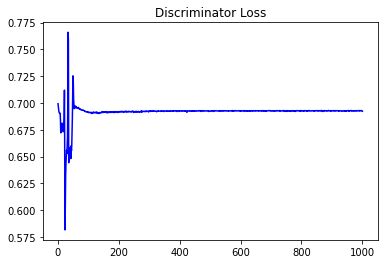

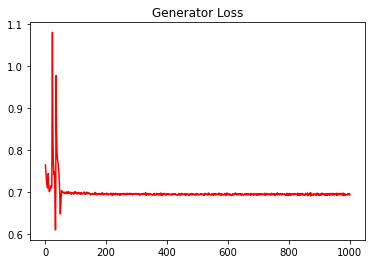

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.029581222344868298


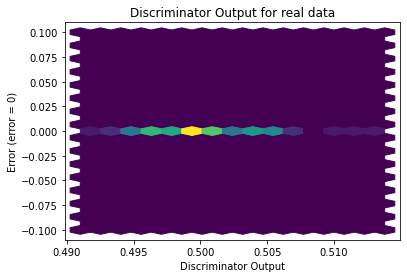

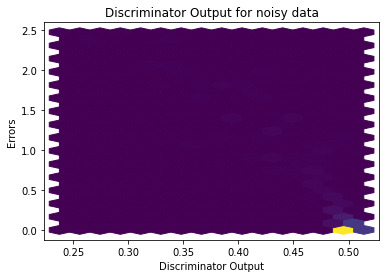

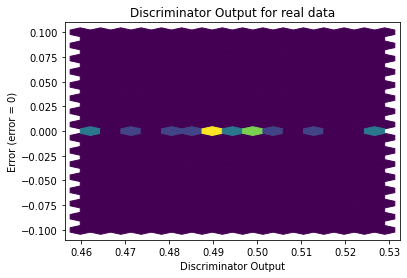

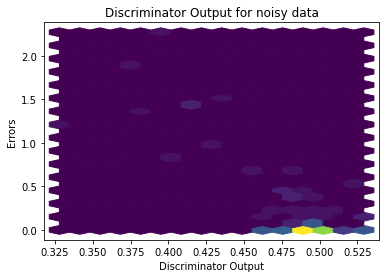

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


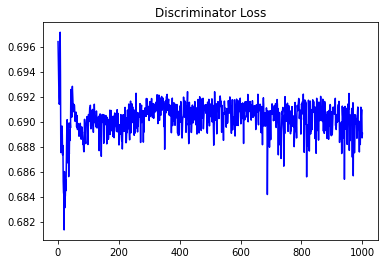

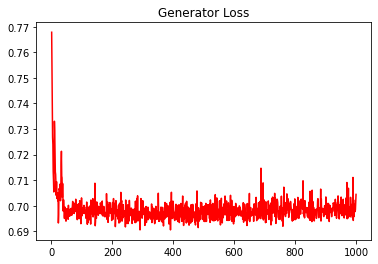

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.035877784787828444


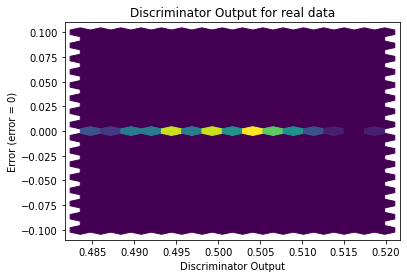

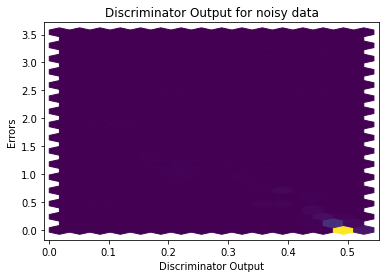

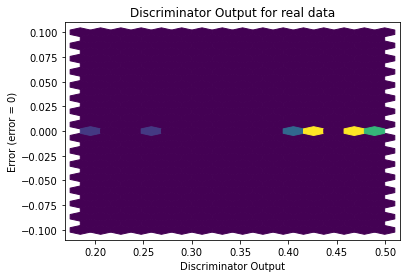

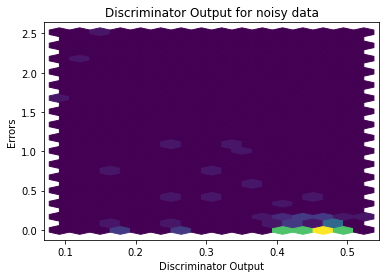

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6970]], requires_grad=True)
